In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from scipy.ndimage import gaussian_filter1d

In [92]:
hadcrut = pd.read_csv('../data/HadCRUT.5.0.2.0.analysis.summary_series.northern_hemisphere.annual.csv')

# Rename the "Time" column to "Year"
hadcrut.rename(columns={"Time": "Year", "Anomaly (deg C)":"HADCRUT_Anomaly"}, inplace=True)

# Display the first few rows of the dataframe
hadcrut.tail()


,Year,HADCRUT_Anomaly,Lower confidence limit (2.5%),Upper confidence limit (97.5%)
170,2020,1.275910,1.237017,1.314802
171,2021,1.078193,1.040193,1.116193
172,2022,1.099802,1.058950,1.140653
173,2023,1.413866,1.370552,1.457180
174,2024,1.558519,1.426528,1.690510


In [91]:
#joblib.dump(hadcrut, '../joblib_files/hadcrut.joblib')

['../joblib_files/hadcrut.joblib']

In [24]:
tmp = pd.read_csv('../data/tmp.txt', delim_whitespace=True)

In [21]:
amo_long_tmp = pd.read_csv('../data/amo_sst.txt', delim_whitespace=True,
                           names=['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [26]:
tmp = tmp.drop(columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Nov', 'Dec'])
tmp['Annual'] = np.mean(tmp.loc[:, 'Jun':'Oct'].values, axis=1)

In [22]:
amo_long_tmp = amo_long_tmp.drop(columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Nov', 'Dec'])
amo_long_tmp['Annual'] = np.mean(amo_long_tmp.loc[:, 'Jun':'Oct'].values, axis=1)

In [23]:
amo_long_tmp = amo_long_tmp[['Year', 'Annual']]

In [24]:
amo_long_tmp.describe()

,Year,Annual
count,167.00000,167.000000
mean,1939.00000,0.033685
std,48.35287,0.224140
min,1856.00000,-0.509333
25%,1897.50000,-0.137500
50%,1939.00000,0.060000
75%,1980.50000,0.185667
max,2022.00000,0.563667


In [25]:
joblib.dump(amo_long_tmp, '../joblib_files/amo_sst_long4.joblib')

['../joblib_files/amo_sst_long4.joblib']

In [263]:
tmp2 = tmp[['Year', 'Annual']]
tmp2

,Year,Annual
0,1950,79.10
1,1951,80.04
2,1952,79.24
3,1953,78.62
4,1954,79.44
...,...,...
68,2018,81.02
69,2019,81.56
70,2020,81.00
71,2021,80.06


In [264]:
joblib.dump(tmp2, "../joblib_files/temp.joblib")

['../joblib_files/temp.joblib']

In [214]:
la_nina = pd.read_csv('../la_nina.txt', delim_whitespace=True,
                      names=['Year', 'JJA',	'JAS', 'ASO', 'SON', 'OND', 'NDJ', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual'])

In [215]:
columns_to_drop = ['OND', 'NDJ','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

la_nina = la_nina.drop(columns=columns_to_drop )

In [185]:
la_nina.to_csv('la_nina.csv')

In [217]:
la_nina['Annual'] = np.mean(la_nina.loc[:, 'JJA':'SON'].values, axis=1)

In [219]:
#joblib.dump(la_nina, "../joblib_files/enso.joblib")

['../joblib_files/enso.joblib']

In [3]:
amo_url = "https://psl.noaa.gov/data/correlation//amon.us.long.data"

In [242]:
data = pd.read_csv(amo_url, delim_whitespace=True, skiprows=6, header=None,
                    names=['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual'],
                    na_values='-99.99')

data = data.iloc[:-5]

In [243]:
columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data[columns] = data[columns].astype(float)

In [244]:
data['Year'] = data['Year'].astype(int)

In [245]:
data

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,1861,0.023,-0.087,0.016,0.270,0.217,0.314,0.436,0.324,0.281,0.236,0.238,0.137,NaN
1,1862,-0.006,-0.142,-0.051,-0.104,-0.160,-0.023,-0.272,-0.246,-0.235,-0.244,-0.331,-0.337,NaN
2,1863,-0.125,-0.023,0.049,0.071,0.044,-0.021,-0.273,-0.279,-0.137,-0.213,-0.157,-0.095,NaN
3,1864,-0.185,-0.335,-0.161,-0.015,0.093,0.136,0.281,0.368,0.215,0.146,0.207,0.209,NaN
4,1865,0.208,0.268,0.181,0.077,0.046,0.216,0.138,0.058,0.301,0.268,0.232,0.232,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2018,0.150,0.040,0.109,0.041,-0.023,-0.034,-0.005,0.090,0.139,0.121,-0.143,-0.083,NaN
158,2019,-0.037,0.058,0.099,0.101,0.065,0.151,0.329,0.315,0.223,0.136,0.087,0.142,NaN
159,2020,0.073,0.333,0.346,0.347,0.243,0.249,0.341,0.425,0.296,0.289,0.113,0.163,NaN
160,2021,0.126,0.139,0.112,0.054,0.072,0.139,0.210,0.245,0.402,0.475,0.445,0.252,NaN


In [246]:
columns_drop = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Nov', 'Dec']
data = data.drop(columns=columns_drop)

In [250]:
data['Annual'] = np.mean(data.loc[:, 'Jun':'Oct'], axis=1)

In [251]:
data.head(5)

,Year,Jun,Jul,Aug,Sep,Oct,Annual
0,1861,0.314,0.436,0.324,0.281,0.236,0.3182
1,1862,-0.023,-0.272,-0.246,-0.235,-0.244,-0.2040
2,1863,-0.021,-0.273,-0.279,-0.137,-0.213,-0.1846
3,1864,0.136,0.281,0.368,0.215,0.146,0.2292
4,1865,0.216,0.138,0.058,0.301,0.268,0.1962


In [34]:
# Smooth the Annual data
smoothed_annual = gaussian_filter1d(amo_long_tmp['Annual'], sigma=2)

In [252]:
#joblib.dump(data, "amo_df.joblib")

['amo_df.joblib']

In [87]:
hadcrut.head(1)

,Year,Anomaly (deg C),Lower confidence limit (2.5%),Upper confidence limit (97.5%)
0,1850,-0.435896,-0.635812,-0.235981


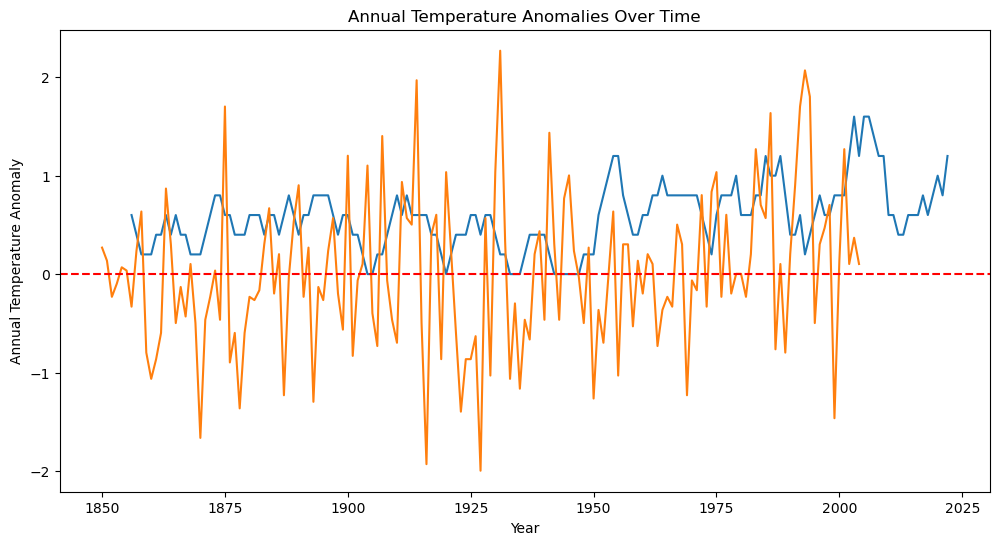

In [249]:
plt.figure(figsize=(12, 6))
#sns.lineplot(data=data, x='Year', y='Annual')
#sns.lineplot(data=amo_long_tmp, x='Year', y=smoothed_annual, label='Smoothed Trend', color='orange')
sns.lineplot(x=cyclones_a_year.index, y=smoothed_total_cyclones)
#sns.lineplot(x=hadcrut['Year'], y=hadcrut['HADCRUT_Anomaly'])
sns.lineplot(x=nassau_mean['Year'], y=nassau_mean['Annual'])
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Annual Temperature Anomalies Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Temperature Anomaly')
plt.show()

In [36]:
file_path = '../data/hurdat2_1851_2023.txt'

In [37]:
# Initialize variables
cyclone_data = []
current_cyclone = None

# Function to convert latitude and longitude to float
def convert_lat_lon(value):
    if 'N' in value or 'E' in value:
        return float(value[:-1])
    elif 'S' in value or 'W' in value:
        return -float(value[:-1])

# Read the file line by line
with open(file_path, 'r') as file:
    for line in file:
        # Check if the line starts with 'AL' indicating a new cyclone
        if line.startswith('AL'):
            if current_cyclone is not None:
                cyclone_data.append(current_cyclone)
            current_cyclone = {'header': line.strip(), 'data': []}
        else:
            if current_cyclone is not None:
                current_cyclone['data'].append(line.strip().split(','))

# Append the last cyclone
if current_cyclone is not None:
    cyclone_data.append(current_cyclone)

# Process each cyclone's data
all_cyclone_dfs = []
for cyclone in cyclone_data:
    df = pd.DataFrame(cyclone['data'], columns=['Date', 'Time', 'Record', 'Status', 'Latitude', 'Longitude', 'WindSpeed', 'Pressure',
                                                'Rad_34_NE', 'Rad_34_SE', 'Rad_34_SW', 'Rad_34_NW', 'Rad_50_NE', 'Rad_50_SE',
                                                'Rad_50_SW', 'Rad_50_NW', 'Rad_64_NE', 'Rad_64_SE', 'Rad_64_SW', 'Rad_64_NW', 'maxwnd'])
    # Convert data types where necessary
    df['Date'] = df['Date'].astype(str)
    df['Time'] = df['Time'].astype(str)
    df['Latitude'] = df['Latitude'].apply(convert_lat_lon)
    df['Longitude'] = df['Longitude'].apply(convert_lat_lon)
    df['WindSpeed'] = df['WindSpeed'].astype(int)
    df['Pressure'] = df['Pressure'].astype(int)
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y%m%d %H%M')
    df.set_index('Datetime', inplace=True)
    df['Cyclone'] = cyclone['header']  # Add a column for the cyclone identifier
    all_cyclone_dfs.append(df)

# Concatenate all cyclone dataframes into a single dataframe
all_data = pd.concat(all_cyclone_dfs)

# Move the Cyclone column to the first position
columns = ['Cyclone'] + [col for col in all_data.columns if col != 'Cyclone']
all_data = all_data[columns]

In [39]:
all_data

,Cyclone,Date,Time,Record,Status,Latitude,Longitude,WindSpeed,Pressure,Rad_34_NE,...,Rad_34_NW,Rad_50_NE,Rad_50_SE,Rad_50_SW,Rad_50_NW,Rad_64_NE,Rad_64_SE,Rad_64_SW,Rad_64_NW,maxwnd
Datetime,,,,,,,,,,,,,,,,,,,,,
1851-06-25 00:00:00,"AL011851, UNNAMED, 14,",18510625,0000,,HU,28.0,-94.8,80,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1851-06-25 06:00:00,"AL011851, UNNAMED, 14,",18510625,0600,,HU,28.0,-95.4,80,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1851-06-25 12:00:00,"AL011851, UNNAMED, 14,",18510625,1200,,HU,28.0,-96.0,80,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1851-06-25 18:00:00,"AL011851, UNNAMED, 14,",18510625,1800,,HU,28.1,-96.5,80,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1851-06-25 21:00:00,"AL011851, UNNAMED, 14,",18510625,2100,L,HU,28.2,-96.8,80,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23 18:00:00,"AL212023, TWENTY-ONE, 6,",20231023,1800,,TD,11.5,-83.2,25,1007,0,...,0,0,0,0,0,0,0,0,0,60
2023-10-24 00:00:00,"AL212023, TWENTY-ONE, 6,",20231024,0000,,TD,12.2,-83.4,25,1007,0,...,0,0,0,0,0,0,0,0,0,60
2023-10-24 01:30:00,"AL212023, TWENTY-ONE, 6,",20231024,0130,L,TD,12.4,-83.5,25,1007,0,...,0,0,0,0,0,0,0,0,0,60


In [40]:
min_lat, max_lat = 27.5, 29.4
min_lon, max_lon = -80.5, -78.8

In [53]:
filtered_data = all_data.copy()

In [54]:
# Filter the data based on the specified latitude and longitude range
filtered_data = filtered_data[(filtered_data['Latitude'] >= min_lat) & (filtered_data['Latitude'] <= max_lat) &
                         (filtered_data['Longitude'] >= min_lon) & (filtered_data['Longitude'] <= max_lon)]


In [55]:
filtered_data['Year'] = filtered_data.index.year

In [56]:
priority_order = {'HU': 1, 'TS': 2, 'TD': 3}
filtered_data['StatusPriority'] = filtered_data['Status']
filtered_data['StatusPriority'].map(priority_order).fillna(4)

Datetime
1852-09-12 18:00:00    4.0
1852-09-13 00:00:00    4.0
1853-10-19 06:00:00    4.0
1853-10-19 12:00:00    4.0
1853-10-19 18:00:00    4.0
                      ... 
2020-08-03 00:00:00    4.0
2020-08-03 06:00:00    4.0
2022-06-05 00:00:00    4.0
2022-09-29 18:00:00    4.0
2022-11-10 07:45:00    4.0
Name: StatusPriority, Length: 180, dtype: float64

In [57]:
filtered_data

,Cyclone,Date,Time,Record,Status,Latitude,Longitude,WindSpeed,Pressure,Rad_34_NE,...,Rad_50_SE,Rad_50_SW,Rad_50_NW,Rad_64_NE,Rad_64_SE,Rad_64_SW,Rad_64_NW,maxwnd,Year,StatusPriority
Datetime,,,,,,,,,,,,,,,,,,,,,
1852-09-12 18:00:00,"AL031852, UNNAMED, 20,",18520912,1800,,TS,28.5,-80.5,50,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1852,TS
1852-09-13 00:00:00,"AL031852, UNNAMED, 20,",18520913,0000,,TS,29.2,-79.0,60,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1852,TS
1853-10-19 06:00:00,"AL081853, UNNAMED, 14,",18531019,0600,,HU,28.0,-78.9,70,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1853,HU
1853-10-19 12:00:00,"AL081853, UNNAMED, 14,",18531019,1200,,HU,28.5,-79.3,80,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1853,HU
1853-10-19 18:00:00,"AL081853, UNNAMED, 14,",18531019,1800,,HU,28.9,-79.6,80,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1853,HU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-03 00:00:00,"AL092020, ISAIAS, 36,",20200803,0000,,TS,28.2,-79.7,60,995,100,...,30,0,20,0,0,0,0,-999,2020,TS
2020-08-03 06:00:00,"AL092020, ISAIAS, 36,",20200803,0600,,TS,29.1,-79.9,60,995,100,...,40,0,20,0,0,0,0,-999,2020,TS
2022-06-05 00:00:00,"AL012022, ALEX, 17,",20220605,0000,,TS,28.0,-78.8,40,999,150,...,0,0,0,0,0,0,0,90,2022,TS


In [23]:
filtered_data.to_csv('aoi_filtered.csv')

In [58]:
only_huricane = filtered_data.copy()

In [59]:
only_huricane['Status'] = only_huricane['Status'].astype(str)

In [60]:
only_huricane['Status'] = only_huricane['Status'].str.strip()

In [61]:
only_huricane['Status'].unique()

array(['TS', 'HU', 'TD', 'EX', 'SS', 'SD', 'LO'], dtype=object)

In [62]:
only_huricane = only_huricane[only_huricane['Status'] == 'HU']

In [63]:
only_huricane['Cyclone'].nunique()

35

In [64]:
hu_trend = only_huricane.groupby('Year')['Cyclone'].nunique()

In [67]:
hu_trend = hu_trend.reindex(all_years.index, fill_value=0)


In [68]:
hu_trend.sum()

35

In [236]:
joblib.dump(hu_trend, "../joblib_files/hu_only.joblib")

['../joblib_files/hu_only.joblib']

Cyclones a year is only calculating the total number of cyclones for the AOI

In [66]:
cyclones_a_year = filtered_data.groupby('Year')['Cyclone'].nunique()
all_years = pd.Series(0, index=np.arange(filtered_data['Year'].min(), filtered_data['Year'].max() + 1))

cyclones_a_year = cyclones_a_year.reindex(all_years.index, fill_value=0)
cyclones_a_year.sum()

101

In [74]:
cyclones_a_year

1852    1
1853    1
1854    1
1855    0
1856    0
       ..
2018    0
2019    2
2020    1
2021    0
2022    3
Name: Cyclone, Length: 171, dtype: int64

In [164]:
joblib.dump(cyclones_a_year, "../joblib_files/total_cyclones.joblib")

['../joblib_files/total_cyclones.joblib']

In [31]:
hurricane_a_year = filtered_data
#hurricane_a_year.sort_values(by=['Cyclone', 'StatusPriority'], inplace=True)

In [32]:
hurricane_a_year

,Cyclone,Date,Time,Record,Status,Latitude,Longitude,WindSpeed,Pressure,Rad_34_NE,...,Rad_50_SE,Rad_50_SW,Rad_50_NW,Rad_64_NE,Rad_64_SE,Rad_64_SW,Rad_64_NW,maxwnd,Year,StatusPriority
Datetime,,,,,,,,,,,,,,,,,,,,,
1910-08-26 12:00:00,"AL011910, UNNAMED, 27,",19100826,1200,,TD,27.5,-79.0,30,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1910,TD
1910-08-26 18:00:00,"AL011910, UNNAMED, 27,",19100826,1800,,TD,28.4,-79.0,30,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1910,TD
1914-09-16 18:00:00,"AL011914, UNNAMED, 19,",19140916,1800,,TS,29.1,-79.2,55,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1914,TS
1915-08-01 12:00:00,"AL011915, UNNAMED, 22,",19150801,1200,,HU,28.4,-80.3,65,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1915,HU
1915-08-01 18:00:00,"AL011915, UNNAMED, 22,",19150801,1800,L,HU,28.7,-80.8,65,990,-999,...,-999,-999,-999,-999,-999,-999,-999,15,1915,HU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969-10-03 18:00:00,"AL241969, JENNY, 16,",19691003,1800,,TD,28.9,-80.6,30,1004,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1969,TD
1969-10-04 00:00:00,"AL241969, JENNY, 16,",19691004,0000,,TD,29.1,-80.9,25,1005,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1969,TD
1969-10-04 06:00:00,"AL241969, JENNY, 16,",19691004,0600,,TD,29.1,-81.2,25,1008,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1969,TD


In [38]:
hurricane_a_year.groupby('Cyclone').first().reset_index()

,Cyclone,Date,Time,Record,Status,Latitude,Longitude,WindSpeed,Pressure,Rad_34_NE,...,Rad_50_SE,Rad_50_SW,Rad_50_NW,Rad_64_NE,Rad_64_SE,Rad_64_SW,Rad_64_NW,maxwnd,Year,StatusPriority
0,"AL011910, UNNAMED, 27,",19100826,1200,,TD,27.5,-79.0,30,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1910,TD
1,"AL011914, UNNAMED, 19,",19140916,1800,,TS,29.1,-79.2,55,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1914,TS
2,"AL011915, UNNAMED, 22,",19150801,1200,,HU,28.4,-80.3,65,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1915,HU
3,"AL011926, UNNAMED, 47,",19260728,0000,,HU,27.7,-80.0,90,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1926,HU
4,"AL011928, UNNAMED, 46,",19280808,1200,,HU,27.6,-80.5,70,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1928,HU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,"AL181974, UNNAMED, 21,",19741007,0600,,SS,28.0,-80.0,40,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1974,SS
128,"AL191975, HALLIE, 14,",19751024,1800,,SD,29.1,-79.3,30,1006,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1975,SD
129,"AL222005, TAMMY, 9,",20051005,1200,,TS,28.3,-80.2,40,1004,180,...,0,0,0,0,0,0,0,-999,2005,TS
130,"AL241969, JENNY, 16,",19691003,0600,,TD,27.6,-81.2,30,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1969,TD


In [71]:
smoothed_total_cyclones = cyclones_a_year.rolling(window=5).mean()

In [70]:
smoothed_annual.shape

(167,)

In [76]:
hu_trend_df = hu_trend.copy()

In [77]:
hu_trend_df = pd.DataFrame(hu_trend_df)

In [78]:
hu_trend_df['Year'] = hu_trend_df.index

In [81]:
hu_trend_df.head(20)

,Cyclone,Year
1852,0,1852
1853,1,1853
1854,1,1854
1855,0,1855
1856,0,1856
1857,0,1857
1858,0,1858
1859,1,1859
1860,0,1860
1861,0,1861


In [165]:
joblib.dump(hu_trend_df, "../joblib_files/hurricane_only.joblib")

['../joblib_files/hurricane_only.joblib']

In [148]:
hu_trend_df.to_csv('onlyhurricane.csv')

In [166]:
hu_trend

1852    0
1853    1
1854    1
1855    0
1856    0
       ..
2018    0
2019    1
2020    0
2021    0
2022    2
Name: Cyclone, Length: 171, dtype: int64

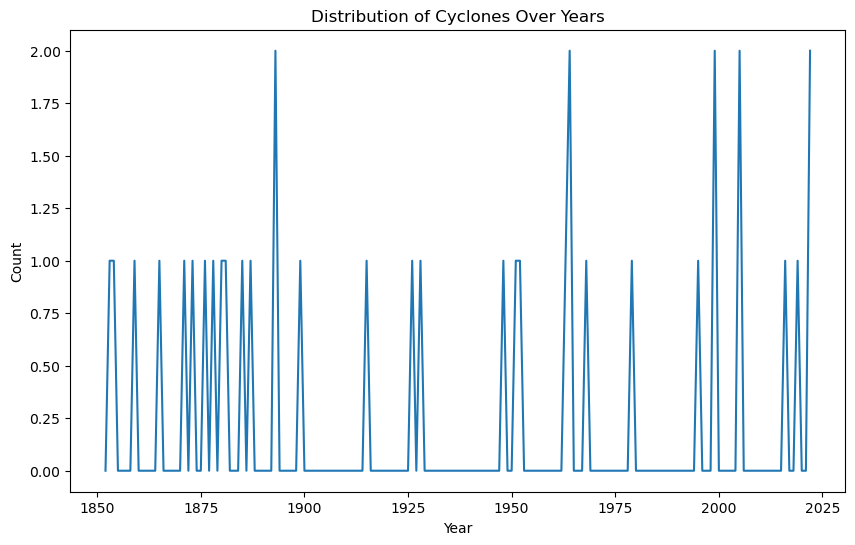

In [80]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=hu_trend_df['Year'], y=hu_trend_df['Cyclone'])
plt.title('Distribution of Cyclones Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [160]:
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], smoothed_annual)
plt.plot(cyclones_a_year.index, smoothed_data)
plt.plot(nassau_mean['Year'], nassau_mean['Annual'])
plt.scatter(hu_trend.index, hu_trend.values)
plt.axhline(y=0, color='r', linestyle='--')

NameError: name 'data' is not defined

<Figure size 1200x600 with 0 Axes>

In [265]:
# Specify the path to your file
file_path = '../data/78073_Nassau_MSLP_18502004_v2.fts'
file_path2 = '../data/72208_Charleston_MSLP_18502004_v2.fts'
file_path3 = '../data/78016_Bermuda_MSLP_18502004_v2.fts'
file_path4 = '../data/76644_Merida_MSLP_18502004_v2.fts'

In [266]:
meridia = pd.read_csv(file_path4, delim_whitespace=True, names=['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual'])
meridia = meridia[1:]
meridia = meridia.drop(columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Nov', 'Dec'])
meridia['Sep'] = meridia['Sep'].astype(float)
meridia['Oct'] = meridia['Oct'].astype(float)
meridia.replace(-999.9, pd.NA, inplace=True)
meridia = meridia.ffill()
meridia['Annual'] = np.mean(meridia[['Aug', 'Sep', 'Oct']].values, axis=1)
meridia['Annual'] = meridia['Annual'] - meridia['Annual'].mean()

In [267]:
meridia_mean = meridia.copy()
meridia_mean['Year'] = meridia_mean['Year'].astype(int)
meridia_mean = meridia_mean[['Year', 'Annual']]

In [271]:
#joblib.dump(meridia_mean, '../joblib_files/meridia.joblib')

['../joblib_files/meridia.joblib']

In [261]:
bermuda2 = pd.read_csv(file_path3, delim_whitespace=True, names=['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual'])
bermuda2 = bermuda2[1:]
bermuda2 = bermuda2.drop(columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Nov', 'Dec'])
bermuda2['Sep'] = bermuda2['Sep'].astype(float)
bermuda2['Oct'] = bermuda2['Oct'].astype(float)
bermuda2.replace(-999.9, pd.NA, inplace=True)
bermuda2 = bermuda2.ffill()
bermuda2['Annual'] = np.mean(bermuda2[['Aug', 'Sep', 'Oct']].values, axis=1)
bermuda2['Annual'] = bermuda2['Annual'] - bermuda2['Annual'].mean()

In [262]:
bermuda_mean = bermuda2.copy()
bermuda_mean['Year'] = bermuda_mean['Year'].astype(int)
bermuda_mean = bermuda_mean[['Year', 'Annual']]

In [264]:
#joblib.dump(bermuda_mean, '../joblib_files/bermuda.joblib')

['../joblib_files/bermuda.joblib']

In [254]:
charleston = pd.read_csv(file_path2, delim_whitespace=True, names=['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual'])
charleston = charleston[1:]
charleston = charleston.drop(columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Nov', 'Dec'])
charleston['Sep'] = charleston['Sep'].astype(float)
charleston['Oct'] = charleston['Oct'].astype(float)
charleston.replace(-999.9, pd.NA, inplace=True)
charleston = charleston.ffill()
charleston['Annual'] = np.mean(charleston[['Aug', 'Sep', 'Oct']].values, axis=1)
charleston['Annual'] = charleston['Annual'] - charleston['Annual'].mean()

In [256]:
charleston_mean = charleston.copy()
charleston_mean['Year'] = charleston_mean['Year'].astype(int)
charleston_mean = charleston_mean[['Year', 'Annual']]

In [258]:
#joblib.dump(charleston_mean, '../joblib_files/charleston.joblib')

['../joblib_files/charleston.joblib']

In [242]:
nassau = pd.read_csv(file_path, delim_whitespace=True, names=['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual'])
nassau = nassau[1:]
nassau = nassau.drop(columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Nov', 'Dec'])
nassau['Sep'] = nassau['Sep'].astype(float)
nassau['Oct'] = nassau['Oct'].astype(float)


In [243]:
nassau.replace(-999.9, pd.NA, inplace=True)
nassau = nassau.ffill()
nassau['Annual'] = np.mean(nassau[['Aug', 'Sep', 'Oct']].values, axis=1)

In [244]:
nassau['Annual'] = nassau['Annual'] - nassau['Annual'].mean()

In [245]:
nassau_mean = nassau.copy()
nassau_mean['Year'] = nassau_mean['Year'].astype(int)
nassau_mean = nassau_mean[['Year', 'Annual']]


In [250]:
#joblib.dump(nassau_mean, '../joblib_files/nassau.joblib')

['../joblib_files/nassau.joblib']

In [222]:
nassau.describe()

,Aug,Sep,Oct,Annual
count,155.000000,155.000000,155.000000,155.000000
mean,1016.313548,1014.572903,1014.205806,1015.030753
std,1.233729,1.107197,1.072213,0.788459
min,1012.300000,1010.800000,1010.500000,1013.033333
25%,1015.550000,1014.000000,1013.600000,1014.533333
50%,1016.500000,1014.600000,1014.200000,1015.000000
75%,1017.100000,1015.200000,1014.900000,1015.483333
max,1019.500000,1018.000000,1017.100000,1017.300000


In [216]:
nassau_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 1 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    155 non-null    int64  
 1   Annual  155 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.6 KB
